In [23]:
!pip -q install torchviz

In [24]:
import torch
from torchviz import make_dot
import numpy as np

## **Computational Graphs Overview**

Building a simple computational graph involves addressing three fundamental tasks:

1. **Tracking Changes in Variables**  
   Determine an efficient way to monitor and log changes to a variable as operations are applied.

2. **Storing Change Information**  
   Devise a structure to store this information in an organized and accessible manner for efficient computation and debugging.

3. **Calculating Derivatives**  
   Implement logic to compute derivatives for each operation applied to the variables, enabling backpropagation for gradient calculations.

### **Note About This Code**

This code is meant to be a simple demonstration of how computational graphs and automatic differentiation work. It’s written with the goal of being easy to follow and understand, not to handle every possible case or edge scenario.

#### **A Few Things to Keep in Mind**:
- It’s designed for learning, not production use, so some situations (like dividing by zero or reusing the same variables again) might not work as expected.
- There might be bugs or unexpected behavior in certain cases because the focus is on showing the basic ideas rather than covering every corner.

#### **Why Keep It Simple?**
The main idea is to help you see how the core concepts work under the hood. It’s a great way to understand the foundations before diving into larger, more complex frameworks like PyTorch or TensorFlow. The code should give you a good starting point for experimenting and learning without getting lost in unnecessary complexity.

## **Manual Approach**

Let's explore how derivatives are calculated manually. In the next few code blocks, we will:

1. Compute partial derivatives for variables after performing a series of operations.
2. Use PyTorch's built-in functionality to observe its results.
3. Perform our own calculations to understand why PyTorch produces those results and how we can replicate the process step by step.

This approach will give us a deeper understanding of how automatic differentiation works under the hood.

### **PyTorch Example**

In this example, we create two variables and perform a series of operations on them. Afterward, we call `.backward()` on the resulting variable to compute the gradients of the initial variables with respect to the output. This demonstrates PyTorch's automatic differentiation system in action, showing how it efficiently tracks operations and calculates gradients.

Additionally, we use the `torchviz` library to visualize the computational graph. This provides a clear representation of the sequence of operations, helping us understand how the calculations are structured internally.

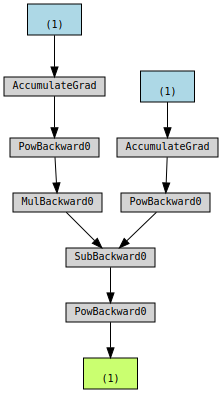

tensor([-864.]) tensor([288.])


In [25]:
a = torch.tensor([2.], requires_grad=True)
b = torch.tensor([6.], requires_grad=True)
c = 3*a**3 - b**2
d = c**2

d.backward()
display(make_dot(d))

print(a.grad, b.grad)

### **Manual Calculation**

Given the following equations:

$$
\begin{align}
a = 2, \quad b = 6 \\
c = 3a^3 - b^2 \\
d = c^2
\end{align}
$$

We aim to calculate $\frac{\partial d}{\partial a} $ and $ \frac{\partial d}{\partial b} $ using the chain rule:

$$
\begin{align}
\frac{\partial d}{\partial a} = \frac{\partial d}{\partial c} \cdot \frac{\partial c}{\partial a}, \quad
\frac{\partial d}{\partial b} = \frac{\partial d}{\partial c} \cdot \frac{\partial c}{\partial b}
\end{align}
$$

### **Step-by-Step Derivatives**

1. Compute the partial derivatives of each component:

   $$
   \frac{\partial d}{\partial c} = 2c, \quad
   \frac{\partial c}{\partial a} = 9a^2, \quad
   \frac{\partial c}{\partial b} = -2b
   $$

2. **Substitute Known Values:**

   - Compute \( c \):
     $$
     c = 3(2)^3 - 6^2 = 3(8) - 36 = 24 - 36 = -12
     $$
   - Compute \( d \):
     $$
     d = (-12)^2 = 144
     $$

3. **Calculate the partial derivatives:**

   - For $ \frac{\partial d}{\partial c} $:

     $$
     \frac{\partial d}{\partial c} = 2(-12) = -24
     $$
   - For $ \frac{\partial c}{\partial a} $:

     $$
     \frac{\partial c}{\partial a} = 9(2)^2 = 9(4) = 36
     $$
   - For $ \frac{\partial c}{\partial b} $:
   
     $$
     \frac{\partial c}{\partial b} = -2(6) = -12
     $$

4. **Combine Using the Chain Rule:**

   - For $ \frac{\partial d}{\partial a} $:

     $$
     \frac{\partial d}{\partial a} = (-24) \cdot 36 = -864
     $$
   - For $ \frac{\partial d}{\partial b} $:
   
     $$
     \frac{\partial d}{\partial b} = (-24) \cdot (-12) = 288
     $$

### **Final Results**

The partial derivatives are:

$$
\boxed{
\frac{\partial d}{\partial a} = -864, \quad \frac{\partial d}{\partial b} = 288
}
$$

In [26]:
#a = 2
b = 6
c = 3*a**3 - b**2
d = c**2

dd_dc = 2*c
dc_da = 9*a**2
dc_db = -2*b

d_da = dd_dc * dc_da
d_db = dd_dc * dc_db

d_da, d_db

(tensor([-864.], grad_fn=<MulBackward0>),
 tensor([288.], grad_fn=<MulBackward0>))

### **Simple Framework**

In this section, we will build a simple class to represent variables and operations in a computational graph. This framework will allow us to:

1. Track changes made to variables through a series of operations.
2. Calculate the derivatives (gradients) of these variables with respect to a final output using the chain rule of calculus.

---

### **Why Does the Framework Work?**

The framework is based on the following principles:

1. **Variable Representation**:  
   Each variable is encapsulated in a `Variable` class that stores:
   - Its current value.
   - Its gradient (initialized to zero).
   - A record of parent variables and the operations that led to its creation.

2. **Tracking Operations**:  
   When operations like addition, subtraction, multiplication, or division are applied to variables, the framework:
   - Creates a new `Variable` instance representing the result.
   - Links the result to its parent variables and stores the operation type.

3. **Backpropagation and Gradients**:  
   Gradients are calculated using the **chain rule**, which states that:
   $$
   \frac{\partial z}{\partial x} = \frac{\partial z}{\partial y} \cdot \frac{\partial y}{\partial x}
   $$
   By recursively traversing the computational graph, we compute the gradient of the final output with respect to each input variable.

---

### **Why Are Gradients for Each Operation Defined as They Are?**

The framework uses predefined gradient rules for common operations. Here's the reasoning behind each:

1. **Addition**:  
   If $ z = x + y $, the gradient of $ z $ with respect to $ x $ or $ y $ is:
   $$
   \frac{\partial z}{\partial x} = 1, \quad \frac{\partial z}{\partial y} = 1
   $$
   This is because the rate of change of the sum is equal to the rate of change of each individual component.

2. **Subtraction**:  
   If $ z = x - y $, the gradients are:
   $$
   \frac{\partial z}{\partial x} = 1, \quad \frac{\partial z}{\partial y} = -1
   $$
   The result decreases as $ y $ increases, hence the negative sign.

3. **Multiplication**:  
   If $ z = x \cdot y $, the gradients are:
   $$
   \frac{\partial z}{\partial x} = y, \quad \frac{\partial z}{\partial y} = x
   $$
   The rate of change of $ z $ with respect to one variable is proportional to the other variable, as the other variable acts as a coefficient.

4. **Division**:  
   If $ z = \frac{x}{y} $, the gradients are:
   $$
   \frac{\partial z}{\partial x} = \frac{1}{y}, \quad \frac{\partial z}{\partial y} = -\frac{x}{y^2}
   $$
   For $ x $, the result increases as $ x $ increases. For $ y $, the result decreases nonlinearly as $ y $ increases.

5. **Exponentiation**:  
   If $ z = x^y $, the gradients are more complex:
   $$
   \frac{\partial z}{\partial x} = y \cdot x^{y-1}
   $$
   The gradient with respect to $ x $ follows the power rule.


### **Why This Approach Matters**

This framework showcases the core logic of autodiff systems by:
- **Tracking Dependencies**: Each variable knows which other variables contributed to its creation and how.
- **Applying the Chain Rule**: By recursively propagating gradients, we can compute how changes in any variable affect the final output.
- **Simplicity**: The minimalist implementation provides a clear foundation for understanding more complex frameworks like PyTorch.



### **Class Definition**

In this class, we override Python's default magic methods, such as `__add__`, `__sub__`, `__mul__`, `__truediv__`, and `__pow__`. These methods are automatically invoked when we use the `+`, `-`, `*`, `/`, and `**` operators, respectively.

By overriding these methods, we retain their original functionality while introducing additional steps to:

1. **Track Operations**:  
   Each operation is logged by recording the parent variables and the type of operation. This dynamic logging constructs the computational graph as the operations are performed.

2. **Create Resultant Variables**:  
   The result of each operation is encapsulated in a new `Variable` instance. This instance contains references to its dependencies (parent variables) and the operation that created it, enabling us to trace the computation.

3. **Enable Gradient Calculation**:  
   The recorded operations allow us to compute gradients through backpropagation. Each operation's specific rules determine how the gradients of the parent variables are computed.

For **asymmetrical operations** (where the derivative with respect to the left operand differs from that of the right operand), both methods must be explicitly handled to ensure correct gradient computation. For example:

- **Subtraction (`-`)**:
  - The left operand's derivative is `1` (positive change).
  - The right operand's derivative is `-1` (negative change).
  - This requires separate implementations for `__sub__` and `__rsub__`.

- **Division (`/`)**:
  - The left operand's derivative is $\frac{1}{\text{denominator}}$.
  - The right operand's derivative is $-\frac{\text{numerator}}{\text{denominator}^2}$.
  - These differences are addressed by defining both `__truediv__` and `__rtruediv__`.

In [27]:
GRADIENT_RULES = {
            'add'  : lambda self, parent, other_parent: 1,
            'sub'  : lambda self, parent, other_parent: 1,
            'rsub' : lambda self, parent, other_parent: -1,
            'mul'  : lambda self, parent, other_parent: other_parent.value,
            'div'  : lambda self, parent, other_parent: 1 / other_parent.value,
            'rdiv' : lambda self, parent, other_parent: -1 * (other_parent.value/parent.value**2),
            'pow'  : lambda self, parent, other_parent: other_parent.value * (parent.value ** (other_parent.value - 1))
}


class Variable:
    def __init__(self, value, name=None):
        self.value = value
        self.grad = 0
        self.parents = []
        self.name = name

    def add_parent(self, parent, op):
        """Add a parent and the operation that produced this variable."""
        self.parents.append((parent, op))

    def _get_other_parent(self, parent):
        for other_parent, _ in self.parents:
            if other_parent != parent:
                return other_parent
        return None, None

    def __repr__(self):
        parent_info = ", ".join([f"{p.name} ({op})" for p, op in self.parents])
        return (
            f"Variable(value={self.value}, grad={self.grad}, name={self.name}, "
            f"parents=[{parent_info}])"
        )

    def __add__(self, other):
        if not isinstance(other, Variable):
            other = Variable(other)

        result = Variable(self.value + other.value)
        result.add_parent(self, 'add')
        result.add_parent(other, 'add')
        return result

    def __radd__(self, other):
        return self.__add__(other)

    def __sub__(self, other):
        if not isinstance(other, Variable):
            other = Variable(other)

        result = Variable(self.value - other.value)
        result.add_parent(self, 'sub')
        result.add_parent(other, 'rsub')
        return result

    def __rsub__(self, other):
        if not isinstance(other, Variable):
            other = Variable(other)

        result = Variable(other.value - self.value)
        result.add_parent(other, 'sub')
        result.add_parent(self, 'rsub')
        return result

    def __mul__(self, other):
        if not isinstance(other, Variable):
            other = Variable(other)

        result = Variable(self.value * other.value)
        result.add_parent(self, 'mul')
        result.add_parent(other, 'mul')
        return result

    def __rmul__(self, other):
        return self.__mul__(other)

    def __truediv__(self, other):
        if not isinstance(other, Variable):
            other = Variable(other)

        result = Variable(self.value / other.value)
        result.add_parent(self, 'div')
        result.add_parent(other, 'rdiv')
        return result

    def __rtruediv__(self, other):
        if not isinstance(other, Variable):
            other = Variable(other)

        result = Variable(other / self.value)
        result.add_parent(other, 'div')
        result.add_parent(self, 'rdiv')
        return result

    def __pow__(self, other):
        if not isinstance(other, Variable):
            other = Variable(other)

        result = Variable(self.value**other.value)
        result.add_parent(self, 'pow')
        result.add_parent(other, 'pow')
        return result

    def accumulate_global_gradients(self):
        for parent, op in self.parents:
            parent.grad = self.grad * parent.grad
            parent.accumulate_global_gradients()

    def calculate_gradients(self, gradient=1):
        self.grad = gradient
        for parent, op in self.parents:
            parent.calculate_gradients(GRADIENT_RULES[op](self, parent, self._get_other_parent(parent)))

    def backpropagate(self):
        self.calculate_gradients()
        self.accumulate_global_gradients()

#### Compare with PyTorch

In [28]:
def compare_with_torch(test_name, var_grad, torch_grad):
    """
    Compare custom implementation gradients with PyTorch gradients.
    """
    print(f"{test_name} - Custom grad: {var_grad}, Torch grad: {torch_grad}")
    assert np.allclose(var_grad, torch_grad), (
        f"Gradients do not match for {test_name}.\n"
        f"Expected (Torch): {torch_grad}, Got (Custom): {var_grad}"
    )

def test_addition():
    a = Variable(2, name="a")
    b = Variable(3, name="b")
    z = a + b
    z.backpropagate()

    a_torch = torch.tensor(2.0, requires_grad=True)
    b_torch = torch.tensor(3.0, requires_grad=True)
    z_torch = a_torch + b_torch
    z_torch.backward()

    compare_with_torch("Addition (a)", a.grad, a_torch.grad.item())
    compare_with_torch("Addition (b)", b.grad, b_torch.grad.item())

def test_subtraction():
    a = Variable(5, name="a")
    b = Variable(3, name="b")
    z = a - b
    z.backpropagate()

    a_torch = torch.tensor(5.0, requires_grad=True)
    b_torch = torch.tensor(3.0, requires_grad=True)
    z_torch = a_torch - b_torch
    z_torch.backward()

    compare_with_torch("Subtraction (a)", a.grad, a_torch.grad.item())
    compare_with_torch("Subtraction (b)", b.grad, b_torch.grad.item())

def test_multiplication():
    a = Variable(2, name="a")
    b = Variable(6, name="b")
    z = a * b
    z.backpropagate()

    a_torch = torch.tensor(2.0, requires_grad=True)
    b_torch = torch.tensor(6.0, requires_grad=True)
    z_torch = a_torch * b_torch
    z_torch.backward()

    compare_with_torch("Multiplication (a)", a.grad, a_torch.grad.item())
    compare_with_torch("Multiplication (b)", b.grad, b_torch.grad.item())

def test_division():
    a = Variable(6, name="a")
    b = Variable(2, name="b")
    z = a / b
    z.backpropagate()

    a_torch = torch.tensor(6.0, requires_grad=True)
    b_torch = torch.tensor(2.0, requires_grad=True)
    z_torch = a_torch / b_torch
    z_torch.backward()

    compare_with_torch("Division (a)", a.grad, a_torch.grad.item())
    compare_with_torch("Division (b)", b.grad, b_torch.grad.item())

def test_power():
    a = Variable(2, name="a")
    b = Variable(3, name="b")
    z = a ** b
    z.backpropagate()

    a_torch = torch.tensor(2.0, requires_grad=True)
    b_torch = torch.tensor(3.0, requires_grad=True)
    z_torch = a_torch ** b_torch
    z_torch.backward()

    compare_with_torch("Power (a)", a.grad, a_torch.grad.item())

test_addition()
test_subtraction()
test_multiplication()
test_division()
test_power()

Addition (a) - Custom grad: 1, Torch grad: 1.0
Addition (b) - Custom grad: 1, Torch grad: 1.0
Subtraction (a) - Custom grad: 1, Torch grad: 1.0
Subtraction (b) - Custom grad: -1, Torch grad: -1.0
Multiplication (a) - Custom grad: 6, Torch grad: 6.0
Multiplication (b) - Custom grad: 2, Torch grad: 2.0
Division (a) - Custom grad: 0.5, Torch grad: 0.5
Division (b) - Custom grad: -1.5, Torch grad: -1.5
Power (a) - Custom grad: 12, Torch grad: 12.0


In [29]:
def test_complex():
    a = Variable(2, name="a")
    b = Variable(3, name="b")
    c = 3*a**3 - b**2
    d = c**2
    d.backpropagate()

    a_torch = torch.tensor(2.0, requires_grad=True)
    b_torch = torch.tensor(3.0, requires_grad=True)
    c_torch = 3 * a_torch**3 - b_torch**2
    d_torch = c_torch**2
    d_torch.backward()

    compare_with_torch("Complex (a)", a.grad, a_torch.grad.item())
    compare_with_torch("Complex (b)", b.grad, b_torch.grad.item())

test_complex()

Complex (a) - Custom grad: 1080, Torch grad: 1080.0
Complex (b) - Custom grad: -180, Torch grad: -180.0
